In [8]:
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import seaborn as sb




In [9]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/bshanmugam/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/bshanmugam/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [20]:
# Load the dataset
data = pd.read_csv('/Users/bshanmugam/Documents/AIENginnering/project-nlp-challenge/dataset/training_data_lowercase.csv')
data.columns = ['label','text']
data.head()

,label,text
0,0,donald trump sends out embarrassing new year‚s...
1,0,drunk bragging trump staffer started russian c...
2,0,sheriff david clarke becomes an internet joke ...
3,0,trump is so obsessed he even has obama‚s name ...
4,0,pope francis just called out donald trump duri...


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34152 entries, 0 to 34151
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   34152 non-null  int64 
 1   text    34152 non-null  object
dtypes: int64(1), object(1)
memory usage: 533.8+ KB


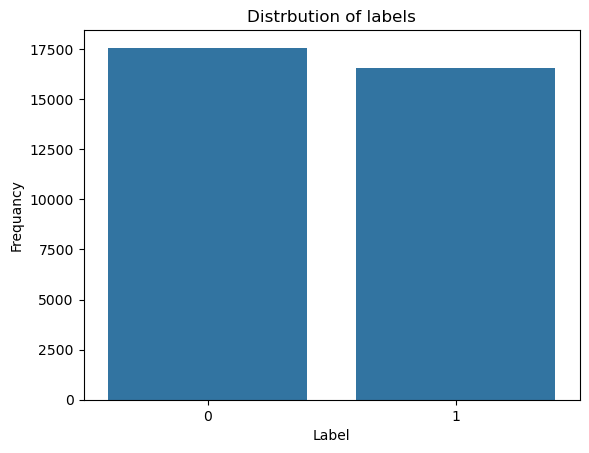

In [22]:
sb.countplot(x='label',data=data)
plt.title("Distrbution of labels")
plt.xlabel("Label")
plt.ylabel("Frequancy")
plt.show();

In [23]:
# Preprocessing function
def preprocess_text(text):

    # Convert to lowercase
    text = text.lower()

    # Remove special characters and numbers
    text = re.sub(r'[^a-z\s]', '', text)

    # Tokenize and remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return ' '.join(tokens)


In [24]:
data['text'] = data['text'].apply(preprocess_text)

In [26]:

X = data['text'] 
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_df=0.95, min_df=0.02)


In [27]:
from sklearn.metrics import accuracy_score, classification_report, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, log_loss

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data 
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# rain the model using Logistic Regression
classifier = LogisticRegression(solver='liblinear')

# Train the classifier on the transformed training data
classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test_tfidf)
y_pred_proba = classifier.predict_proba(X_test_tfidf)  # Needed for log loss

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
loss = log_loss(y_test, y_pred_proba)  # Log loss

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Log Loss: {loss:.4f}')

print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 73.81%
Log Loss: 0.4744

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.56      0.69      3529
           1       0.66      0.93      0.78      3302

    accuracy                           0.74      6831
   macro avg       0.78      0.74      0.73      6831
weighted avg       0.78      0.74      0.73      6831



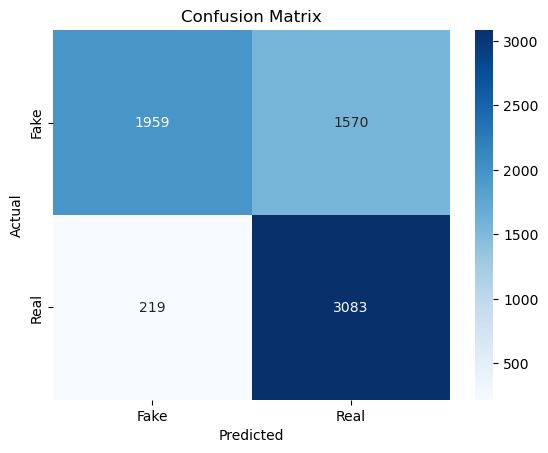

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [29]:
from sklearn.pipeline import Pipeline
import joblib

pipeline = Pipeline([('vectorizer', tfidf_vectorizer), ('classifier', classifier)])

# Save the entire pipeline
joblib.dump(pipeline, 'LogisticRegression.pkl')


['LogisticRegression.pkl']

In [30]:
loaded_pipeline = joblib.load('LogisticRegression.pkl')

# Use the loaded pipeline to make predictions on the test set
y_pred_loaded = loaded_pipeline.predict(X_test)

# Evaluate the accuracy of the loaded model
accuracy_loaded = accuracy_score(y_test, y_pred_loaded)
print(f'Loaded model accuracy: {accuracy_loaded * 100:.2f}%')

Loaded model accuracy: 73.81%
